# 1 Load the data and some intial exploartion of the data 

In [4]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('Cars.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [67]:
#basic summary 

# Dimension of the data
num_rows, num_cols = df.shape

# Data types of each column
data_types = df.dtypes

# Display the dimensions and data types
print(f"Dimensions of the data: {num_rows} rows x {num_cols} columns")
print("\nData types of each column:")
print(data_types)
summary_stats = df.describe()

print(summary_stats)

Dimensions of the data: 8128 rows x 13 columns

Data types of each column:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object
              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


In [68]:
#columns as 'name', 'fuel', 'seller_type', 'transmission', 'owner' are likely catgoical 

# Count unique categories for each column
categorical_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

for column in categorical_columns:
    unique_categories_count = df[column].nunique()
    print(f"Number of unique categories in '{column}': {unique_categories_count}")
    
# List unique categories for each categorical column
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

for column in categorical_columns:
    unique_categories = df[column].unique()
    print(f"Unique categories in '{column}':")
    for category in unique_categories:
        print(f"- {category}")
    print("\n")
    

Number of unique categories in 'name': 2058
Number of unique categories in 'fuel': 4
Number of unique categories in 'seller_type': 3
Number of unique categories in 'transmission': 2
Number of unique categories in 'owner': 5
Unique categories in 'fuel':
- Diesel
- Petrol
- LPG
- CNG


Unique categories in 'seller_type':
- Individual
- Dealer
- Trustmark Dealer


Unique categories in 'transmission':
- Manual
- Automatic


Unique categories in 'owner':
- First Owner
- Second Owner
- Third Owner
- Fourth & Above Owner
- Test Drive Car




# 2 Preprocssing

In [72]:
# Extract the first word from the 'name' column and rename it to 'brand'
df = df.rename(columns={'name': 'brand'})
df['brand'] = df['brand'].str.split().str[0]

# Define a mapping dictionary for the 'owner' column, then replace the categories with numerical values
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}
df['owner'] = df['owner'].map(owner_mapping)

# remove rows with 'owner' value of 5,ie,Test Drive Cars
df = df[df['owner'] != 5]

df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [74]:
#remove some unnecessary rows and columns

# As CNG and LPG use a different mileage system,all rows with CNG and LPG will be removed
fuel_counts = df['fuel'].value_counts()
print(fuel_counts)

df = df[~df['fuel'].isin(['CNG', 'LPG'])]
#reset the index 
df.reset_index(drop=True, inplace=True)

#Drop the feature torque 
df.drop(columns=['torque'], inplace=True)

# Print the row count
row_count = df.shape[0]
print("Number of rows:", row_count)

df.head()

Diesel    4401
Petrol    3627
CNG         57
LPG         38
Name: fuel, dtype: int64
Number of rows: 8028


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [75]:
#  extract the numeric part for the following columns

columns_to_process = ['mileage', 'max_power', 'engine']

# Loop through each column and apply the same operations
for col in columns_to_process:
    # Convert the column to strings
    df[col] = df[col].astype(str)
    
    # Use regular expressions to extract the numeric part
    df[col] = df[col].str.extract('(\d+\.\d+|\d+)').astype(float)

df.head()


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [76]:
#store the preprocesed data 
df.to_csv('car_pre.csv', index=False)

# 3Prediction

In [66]:
# read in the data of initial preprocessing
df = pd.read_csv('car_pre.csv')
# some summary after preprocsessing
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)

# Data types of each column
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)

brand_counts = df['brand'].value_counts()

# Print the counts
print(brand_counts)

              year  selling_price     km_driven        owner      mileage  \
count  8028.000000   8.028000e+03  8.028000e+03  8028.000000  7814.000000   
mean   2013.815521   6.403937e+05  6.977314e+04     1.458022    19.391962   
std       4.030836   8.027015e+05  5.664419e+04     0.715283     4.001972   
min    1983.000000   2.999900e+04  1.000000e+03     1.000000     0.000000   
25%    2011.000000   2.600000e+05  3.500000e+04     1.000000    16.780000   
50%    2015.000000   4.500000e+05  6.000000e+04     1.000000    19.300000   
75%    2017.000000   6.800000e+05  9.800000e+04     2.000000    22.320000   
max    2020.000000   1.000000e+07  2.360457e+06     4.000000    42.000000   

            engine    max_power        seats  
count  7814.000000  7820.000000  7814.000000  
mean   1462.914640    91.819726     5.421551  
std     504.759742    35.804513     0.963125  
min     624.000000     0.000000     2.000000  
25%    1197.000000    68.850000     5.000000  
50%    1248.000000    82

In [69]:
#check and handle missing values

# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

# Count the number of rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Get the count of rows with missing values
num_rows_with_missing_values = len(rows_with_missing_values)
print("Number of rows with missing values:", num_rows_with_missing_values)

# Drop rows with missing values
df = df.dropna()

# Count the rows in the new DataFrame
num_rows = df.shape[0]
print("Number of rows in df_cleaned:", num_rows)

#store the procesed data ready for model 
df.to_csv('car_pro.csv', index=False)

brand            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64
Number of rows with missing values: 0
Number of rows in df_cleaned: 7814


/var/folders/km/934vm_xd0bq0l672hwwd2_k00000gn/T/ipykernel_4593/2760034285.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


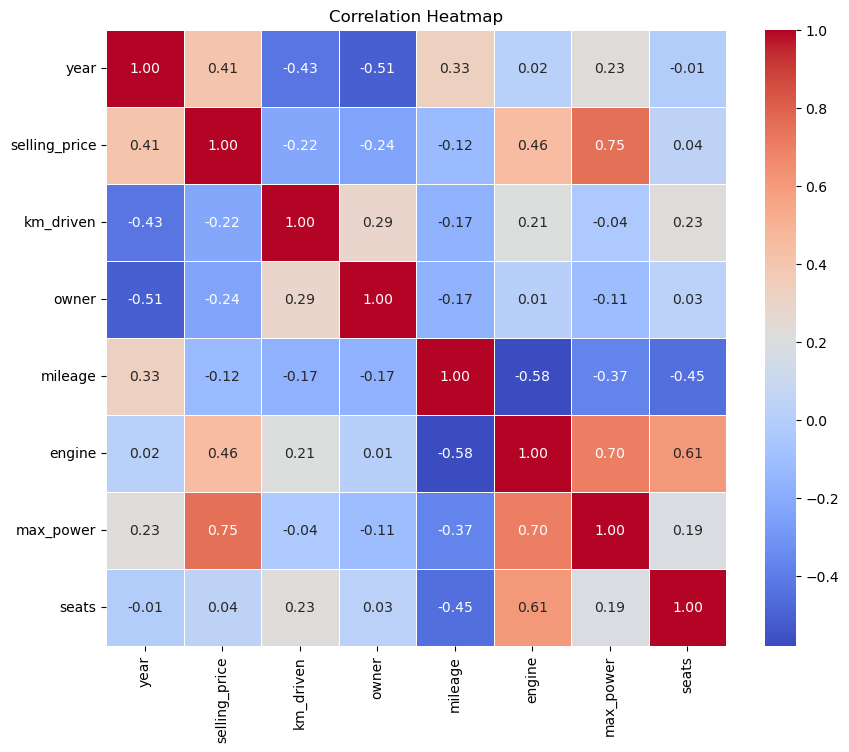

In [68]:
#correlation
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From the correlation heatmap, the selling price is much more correlated with year engine and max power than the others. For numerial features, I will pick these 3 variables for linear rgression,.

In [70]:
#linear regression dropping 4 low correlated numerical features

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('car_pro.csv')

columns_to_drop = ['km_driven', 'owner', 'mileage', 'seats']

# Create a new DataFrame by dropping the specified columns
df = df.drop(columns=columns_to_drop)

# Display the new DataFrame
print(new_df.head())

# Perform a log transform on the 'selling_price' column
df['selling_price'] = np.log(df['selling_price'])

# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df, columns=['brand', 'fuel', 'seller_type', 'transmission'])

# Separate the target variable ('selling_price') and features
X = df_encoded.drop(columns=['selling_price'])
y = df_encoded['selling_price']  # Use the log-transformed target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

print("X_train shape", X_train.shape)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) and R-squared (R2) on the log-transformed data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results on the log-transformed scale
print(f"Mean Squared Error (MSE) on the log-transformed scale: {mse:.2f}")
print(f"R-squared (R2) on the test data (log-transformed): {r2:.2f}")

# Transform the predicted log-transformed values back to the original scale
y_pred_original = np.exp(y_pred)

# Calculate the MSE and R2 on the original scale
mse_original = mean_squared_error(np.exp(y_test), y_pred_original)
r2_original = r2_score(np.exp(y_test), y_pred_original)

# Print the results on the original scale
print(f"Mean Squared Error (MSE) on the original scale: {mse_original:.2f}")
print(f"R-squared (R2) on the test data (original scale): {r2_original:.2f}")


     brand  year  selling_price    fuel seller_type transmission  engine  \
0   Maruti  2014      13.017003  Diesel  Individual       Manual  1248.0   
1    Skoda  2014      12.821258  Diesel  Individual       Manual  1498.0   
2    Honda  2006      11.970350  Petrol  Individual       Manual  1497.0   
3  Hyundai  2010      12.323856  Diesel  Individual       Manual  1396.0   
4   Maruti  2007      11.775290  Petrol  Individual       Manual  1298.0   

   max_power  
0      74.00  
1     103.52  
2      78.00  
3      90.00  
4      88.20  
X_train shape (6251, 41)
Mean Squared Error (MSE) on the log-transformed scale: 0.06
R-squared (R2) on the test data (log-transformed): 0.91
Mean Squared Error (MSE) on the original scale: 59250729486.78
R-squared (R2) on the test data (original scale): 0.92


In [71]:
##linear regression on all features

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('car_pro.csv')
# Perform a log transform on the 'selling_price' column
df['selling_price'] = np.log(df['selling_price'])

# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df, columns=['brand', 'fuel', 'seller_type', 'transmission'])

# Separate the target variable ('selling_price') and features
X = df_encoded.drop(columns=['selling_price'])
y = df_encoded['selling_price']  # Use the log-transformed target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

print("X_train shape", X_train.shape)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) and R-squared (R2) on the log-transformed data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results on the log-transformed scale
print(f"Mean Squared Error (MSE) on the log-transformed scale: {mse:.2f}")
print(f"R-squared (R2) on the test data (log-transformed): {r2:.2f}")

# Transform the predicted log-transformed values back to the original scale
y_pred_original = np.exp(y_pred)

# Calculate the MSE and R2 on the original scale
mse_original = mean_squared_error(np.exp(y_test), y_pred_original)
r2_original = r2_score(np.exp(y_test), y_pred_original)

# Print the results on the original scale
print(f"Mean Squared Error (MSE) on the original scale: {mse_original:.2f}")
print(f"R-squared (R2) on the test data (original scale): {r2_original:.2f}")


X_train shape (6251, 45)
Mean Squared Error (MSE) on the log-transformed scale: 0.06
R-squared (R2) on the test data (log-transformed): 0.90
Mean Squared Error (MSE) on the original scale: 55575192539.87
R-squared (R2) on the test data (original scale): 0.92


In [3]:
#random forest regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('car_pro.csv')

# Perform a log transform on the 'selling_price' column
df['selling_price'] = np.log(df['selling_price'])

# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df, columns=['brand', 'fuel', 'seller_type', 'transmission'])

# Separate the target variable ('selling_price') and features
X = df_encoded.drop(columns=['selling_price'])
y = df_encoded['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Create and train a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=27)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) and R-squared (R2) on the log-transformed data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error (MSE) on the log-transformed scale: {mse:.2f}")
print(f"R-squared (R2) on the test data (log-transformed): {r2:.2f}")

# Transform the predicted log-transformed values back to the original scale
y_pred_original = np.exp(y_pred)

# Calculate the MSE and R2 on the original scale
mse_original = mean_squared_error(np.exp(y_test), y_pred_original)
r2_original = r2_score(np.exp(y_test), y_pred_original)

# Print the results on the original scale
print(f"Mean Squared Error (MSE) on the original scale: {mse_original:.2f}")
print(f"R-squared (R2) on the test data (original scale): {r2_original:.2f}")



Mean Squared Error (MSE) on the log-transformed scale: 0.04
R-squared (R2) on the test data (log-transformed): 0.94
Mean Squared Error (MSE) on the original scale: 15360915390.64
R-squared (R2) on the test data (original scale): 0.98


In [2]:
X_test.head()

,year,km_driven,owner,mileage,engine,max_power,seats,brand_Ambassador,brand_Ashok,brand_Audi,...,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
3800,2017,60000,1,22.77,1498.0,98.59,5.0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4329,2016,56900,2,13.68,2393.0,147.80,8.0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
7521,2015,60000,1,18.60,1197.0,81.83,5.0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1433,2011,90000,3,12.05,2179.0,120.00,8.0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4982,2009,120000,2,12.05,2179.0,120.00,7.0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


# Report

Based on the correlation heatmap, the selling price exhibits notably stronger correlations with the 'year,' 'engine,' and 'max power' features, all exceeding a correlation coefficient of 0.4. Consequently, I constructed a linear regression model utilizing these three variables but dropped the other low correlated features.  This model performs nearly as effectively as the one incorporating all numerical features, as evident from similar Mean Squared Error (MSE) and R-squared (R2) scores.

Ultimately, the linear regression model that omits the four less-correlated numerical features is favored over the one including all numerical features,becasue of the ease of interpretation and simplicity associated with fewer features. However, it's noteworthy that the Random Forest regression model demonstrates a substantial performance improvement compared to linear regression, highlighting its superior predictive capabilities.